In [507]:
import pandas as pd
import numpy as np

In [10]:
long = pd.read_csv('all_stocks_5yr.csv')
long.head()

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [12]:
len(long['Name'].unique())

503

In [508]:
mmm = long[long['Name'] == 'MMM']
mmm.head()

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [15]:
goog = long[long['Name'] == 'GOOG']
goog.head()

,Date,Open,High,Low,Close,Volume,Name
33282,2012-08-13,323.39,329.74,323.02,329.67,NaN,GOOG
33283,2012-08-14,329.30,336.09,329.17,334.00,NaN,GOOG
33284,2012-08-15,334.80,336.79,331.72,333.44,NaN,GOOG
33285,2012-08-16,333.42,336.98,333.21,336.10,NaN,GOOG
33286,2012-08-17,336.72,338.29,335.51,338.23,NaN,GOOG


In [17]:
# using all unique timestamp and closing price as columns for Xs and Y
# company names as row names 

In [48]:
timecol = long['Date'].unique()

In [30]:
dt = long[['Date', 'Close', 'Name']]


len(dt[dt['Date'] == '2012-08-13'])

460

In [70]:
dt.head()

,Date,Close,Name
0,2012-08-13,92.40,MMM
1,2012-08-14,92.30,MMM
2,2012-08-15,92.54,MMM
3,2012-08-16,93.74,MMM
4,2012-08-17,94.24,MMM


In [73]:
dt.groupby('Name').count().head()

,Date,Close
Name,,
A,1258,1258
AAL,926,926
AAP,1258,1258
AAPL,1258,1258
ABBV,1177,1177


In [90]:
print (len(dt['Date'].unique()))

len(dt.groupby('Name')['Date'].unique().iloc[0])

1258


1258

In [103]:
dt[dt['Name'] == 'A'].head()

,Date,Close,Name
16272,2012-08-13,40.38,A
16273,2012-08-14,40.49,A
16274,2012-08-15,40.48,A
16275,2012-08-16,37.15,A
16276,2012-08-17,37.22,A


In [191]:
np.mean(ref[ref['Name'] == 'AAL'].fillna(0), axis = 1)

1    30.554793
dtype: float64

In [195]:
# data restructure 

refold = pd.pivot_table(dt, index = 'Name', columns = 'Date', values = 'Close').reset_index()
refold.head()

Date,Name,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,...,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11
0,A,40.38,40.49,40.48,37.15,37.22,36.68,37.13,37.46,37.47,...,59.79,59.94,60.20,60.37,60.13,60.87,60.14,59.68,58.57,59.33
1,AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.44,51.06,50.45,50.55,50.80,50.58,50.00,49.40,48.55,48.35
2,AAP,69.11,70.67,71.30,72.46,72.87,71.58,72.00,72.20,71.96,...,112.01,114.05,114.48,110.53,111.01,109.49,109.39,109.18,106.13,107.34
3,AAPL,90.00,90.24,90.12,90.91,92.59,95.02,93.72,95.55,94.66,...,148.73,150.05,157.14,155.57,156.39,158.81,160.08,161.06,155.32,157.48
4,ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.91,70.38,70.71,70.99,70.99,71.22,71.47,72.02,70.44,70.63


In [196]:
# replace NaN with row average

ref = refold.T.fillna(refold.mean(axis=1)).T

In [509]:
# on 2017-08-11, the last recorded date for closing stock price, every company has an entry
# try to predict the closing stock price on this day 

sum(ref[ref.columns[-1]].isnull())

0

In [510]:
y = ref[ref.columns[-1]]

x = ref[ref.columns[1:-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [201]:
# x_train

In [116]:
# from keras.models import Sequential
# from keras.layers import Dense

# from sklearn.model_selection import train_test_split


# y = dt['Close']
# x = pd.to_datetime(dt['Date'])

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 



# model = Sequential()
# model.add(Dense(8, input_dim = 1, activation = 'relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer = 'sgd')
# model.fit(x_train, y_train, nb_epoch = 20, batch_size = 2, verbose = 2)

In [299]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [202]:
# KNN 
from sklearn.neighbors import KNeighborsRegressor

In [203]:
kreg = KNeighborsRegressor(n_neighbors = 10)
kreg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [219]:
print(y_train.shape)

# testing set index should not exceed 100 
print(y_test.shape)

(402,)
(101,)


In [222]:
x_train.columns[-1]

'2017-08-10'

In [223]:
# prediction check

comp = 100
print (y_test.iloc[comp])
# stock price one day before the expected predicting date 
print (x_test.iloc[comp][x_train.columns[-1]])

print (kreg.predict(x_test.iloc[comp]))

28.82
29.13
[24.871000000000002]


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [213]:
x_train[:5]

Date,2012-08-13,2012-08-14,2012-08-15,2012-08-16,2012-08-17,2012-08-20,2012-08-21,2012-08-22,2012-08-23,2012-08-24,...,2017-07-28,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-07,2017-08-08,2017-08-09,2017-08-10
261,18.92,18.07,18.44,18.59,18.45,18.33,18.2,18.26,18.23,17.74,...,27.77,27.95,28.27,28.22,28.34,28.14,28.29,28.25,28.33,27.44
71,21.01,21,21.32,21.57,21.53,21.46,21.22,21.38,21.08,21.06,...,41.89,41.9,41.99,41.88,40.61,40.56,41.17,41.09,40.28,40.05
477,44.32,44,44.17,45.41,45.48,45.32,44.66,44.5,43.48,43.63,...,84.97,85.12,85.67,84.37,84.51,81.17,80.97,81.34,80.99,79.19
6,33,33.08,33.21,33.22,32.96,32.86,32.65,32.77,32.66,32.92,...,49.61,49.18,49.15,49.23,49.16,49.26,49.3,48.88,48.77,48.06
415,60.87,59.31,59.13,58.6,58.65,58.37,58.4,58.63,58.8,59.62,...,86.91,87.41,87.57,87.97,88.05,87.29,87.66,87.8,87.26,86.83


## K nearest neighbour regression Parameter tuning

In [511]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer, mean_squared_error

In [512]:
# set of hyperparameters KNN regressor 

# model.get_params().keys() - check parameter names in the current model
params = {'n_neighbors': np.arange(1, 11, 1), 'metric': ['euclidean']}

# grid search approach

model = KNeighborsRegressor()
grid = GridSearchCV(model, params)

grid.fit(x_train, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'metric': ['euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [513]:
r2 = grid.score(x_test, y_test)

# best parameter 
print (grid.best_params_)

# score here is the R^2 correlation of coefficients
print (grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 3}
0.745339441866


In [319]:
# grid.cv_results_

In [327]:
tuned = KNeighborsRegressor(n_neighbors = 3)
tuned.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [328]:
# prediction check

comp = 100
print (y_test.iloc[comp])
# stock price one day before the expected predicting date 
print (x_test.iloc[comp][x_train.columns[-1]])

print (tuned.predict(x_test.iloc[comp]))

28.82
29.13
[27.276666666666667]


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [307]:
# grid search with R^2 scoring 

neighbors = np.arange(1, 51, 2)
r2_score = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'r2')
    r2_score.append(scores.mean())
    
    
# optimal number of neighbours
neighbors[r2_score.index(min(r2_score))]

49

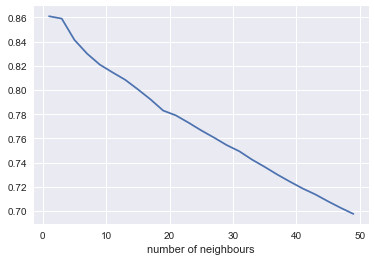

In [308]:
plt.plot(neighbors, r2_score)
plt.xlabel('number of neighbours')

In [515]:
# # grid search with defiend MSE

# MSE = make_scorer(mean_squared_error)

# neighbours = np.arange(1, 41, 2)
# mse_error = []

# for k in neighbours:
#     knn = KNeighborsRegressor(n_neighbors = k)
#     scores = cross_val_score(knn, x_train, y_train, cv = 5, scoring = MSE)
#     mse_error.append(scores.mean())
    
    
# # optimal number of neighbours from grid search and self defined loss function 

# neighbours[mse_error.index(min(mse_error))]

In [280]:
# high dimensional data and KNN

x_train.shape

(402, 1257)

In [330]:
# randomnized search approach 

randgrid = RandomizedSearchCV(model, params)
randgrid.fit(x_train, y_train)

print (randgrid.best_params_)

{'n_neighbors': 3, 'metric': 'euclidean'}


## what will happen if perform PCA before KNN 

In [334]:
from sklearn.decomposition import PCA


In [590]:
# normalization before PCA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# scaling 
x_mean = np.mean(x, axis = 0)
x_scaled = x - x_mean
x_train_scaled = x_train - x_mean
x_test_scaled = x_test - x_mean

In [537]:
# PCA summary function - where the input variable pca is a PCA object

def pca_summary(pca, standardised_data, out = True):
    names = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) +  1)]
    a = list(np.std(pca.transform(standardised_data), axis = 0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index = names, columns = columns)
    if out:
        print("Importance of components:")
#         display(summary)
    return summary

In [586]:
pca = PCA().fit(x_train_scaled)

summary = pca_summary(pca, x_train_scaled)
summary

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.991583e+03,9.506357e-01,0.950636
PC2,4.865658e+02,2.514753e-02,0.975783
PC3,3.220231e+02,1.101504e-02,0.986798
PC4,2.187830e+02,5.084393e-03,0.991883
PC5,1.303453e+02,1.804689e-03,0.993687
PC6,1.136482e+02,1.371946e-03,0.995059
PC7,9.528587e+01,9.644263e-04,0.996024
PC8,7.098698e+01,5.352658e-04,0.996559
PC9,6.789732e+01,4.896856e-04,0.997049


In [539]:
# decide the optimal number of principal components 

def screeplot(pca, standardised_data):
    fig = plt.figure(figsize = (10, 10))
    y = np.std(pca.transform(standardised_data), axis = 0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp." + str(i) for i in x], rotation = 60)
    plt.ylabel("Variance")
    plt.show()

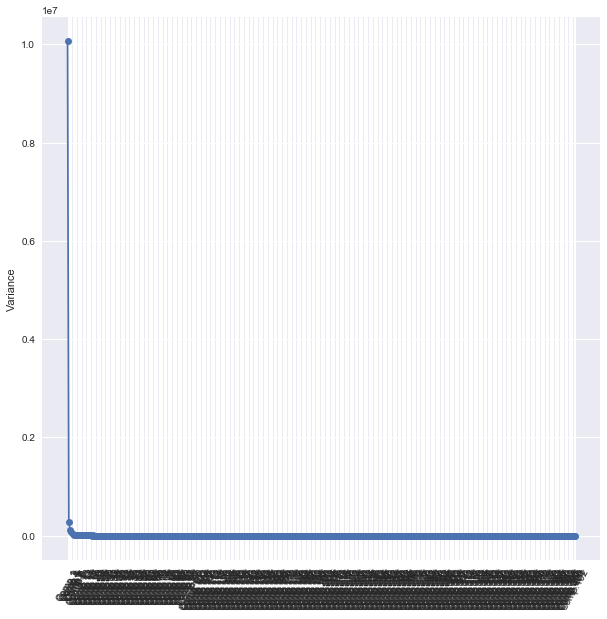

In [587]:
screeplot(pca, x_scaled)

In [596]:
# pca fit finds the new dimensions that the data are to be projected onto
pca = PCA(n_components = 3).fit(x_train_scaled)
pca.components_

# pca transform gives the projected data vectors 
pca_x = pca.transform(x_train_scaled)

In [595]:
# according to the PCA summarization table, the first 3 PC accounts for around 99% variability in the data  
# fit_transform apply PCA to column mean SUBTRACTED x_train, x_test

pcax_train = PCA(n_components = 3).fit_transform(x_train_scaled)
pcax_test = PCA(n_components = 3).fit_transform(x_test_scaled)
pcay_train = y_train
pcay_test = y_test

In [597]:
# deciding hyperparameters for KNN regressor 

# model.get_params().keys() - check parameter names in the current model
params = {'n_neighbors': np.arange(1, 11, 1), 'metric': ['euclidean']}

# grid search approach

model = KNeighborsRegressor()
grid = GridSearchCV(model, params)

grid.fit(pcax_train, pcay_train)

print (grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 5}


In [598]:
# R^2 score ? 

grid.best_score_

0.74162463323861549

In [599]:
pca_knn = KNeighborsRegressor(n_neighbors = 5)
pca_knn.fit(pcax_train, pcay_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [604]:
# model prediction checking 

comp = 97
print (pcay_test.iloc[comp])

# stock price one day before the predicted date 
print (x.iloc[y[y == pcay_test.iloc[comp]].index.values][x.columns[-1]])

# predcition from KNN, k = 5
print (pca_knn.predict(pcax_test[comp]))

128.18
443    129.69
Name: 2017-08-10, dtype: object
[126.15]


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


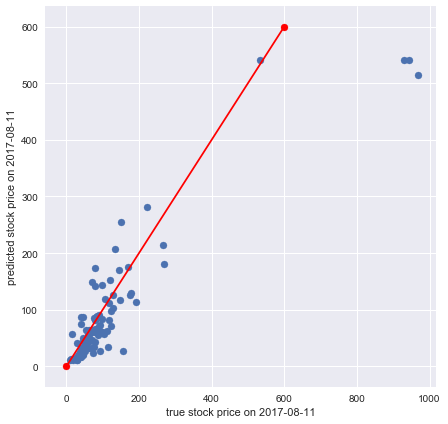

In [607]:
# plot y_test from pca and knn(k = 5)

fig = plt.figure(figsize = (7, 7))

plt.scatter(pcay_test, pca_knn.predict(pcax_test))
plt.scatter([0, 600], [0, 600], color = 'r')
plt.plot([0, 600], [0, 600], color = 'r')

plt.xlabel('true stock price on 2017-08-11')
plt.ylabel('predicted stock price on 2017-08-11')

plt.show()

In [546]:
# final model should be fitted on the entire dataset?
# however, KNN does not really require that kind of training  

In [602]:
# calculate RMSE on the testing testing set from PCA(n_components = 3) and KNN(n_neighbors = 5)

sum((pca_knn.predict(pcax_test) - pcay_test) ** 2)

651545.262952

In [ ]:
# RMSE from KNN without PCA

tuned = KNeighborsRegressor(n_neighbors = 3)
tuned.fit(x_train, y_train)

sum((tuned.predict(x_test) - y_test) ** 2)

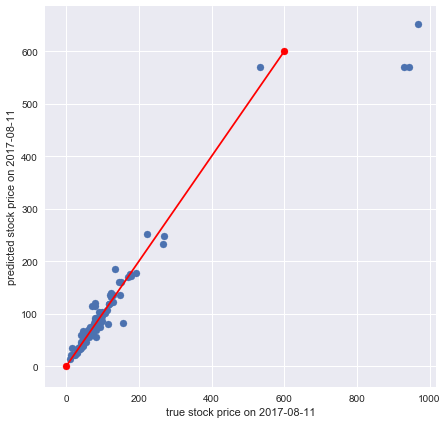

In [608]:
# plot y_test without pca but knn(k = 3)

fig = plt.figure(figsize = (7, 7))

plt.scatter(y_test, tuned.predict(x_test))
plt.scatter([0, 600], [0, 600], color = 'r')
plt.plot([0, 600], [0, 600], color = 'r')

plt.xlabel('true stock price on 2017-08-11')
plt.ylabel('predicted stock price on 2017-08-11')

plt.show()

In [542]:
# from sklearn.cross_validation import KFold
# from sklearn import decomposition


# def compute_test (x_test, y_test, model, cv):
#     kf = KFold(x_test.shape[0], n_folds = cv)
    
#     SS_scores = []
    
#     for i, j in kf:
#         test_set = x_test[j]
#         test_value = y_test[j]
        
#         # KNN evaluation done by RMSE 
#         SS_scores.append((test_value - model.predict(test_set))** 2 )
        
#     return np.mean(SS_scores)

In [543]:
# k = np.arange(20) + 1
# parameters = {'n_neighbors': k, 'metric': ['euclidean']}

# knn_model = KNeighborsRegressor()
# grid = GridSearchCV(knn_model, parameters, cv = 10)


# reg_eval = []
# params = []

# num_dim = [1, 2, 3, 4, 5, 6, 7]

# for d in num_dim:
#     svd = decomposition.TruncatedSVD(n_components = d)
    
#     if d < 402:
#         x_fit = svd.fit_transform(x_train)
#         x_fit_atest = svd.transform(x_train)
        
#     else:
#         x_nl = x_train
#         x_nl1 = x_test
        
#     grid.fit(x_fit, y_train)
    
#     reg_eval.append(compute_test(x_test = x_fit_atest, y_test = y_test, model = grid, cv = 10))
#     params.append(grid.best_params_['n_neighbors'])

In [544]:
# k = np.arange(20) + 1
# parameters = {'n_neighbors': k, 'metric': ['euclidean']}

# knn_model = KNeighborsRegressor()
# grid = GridSearchCV(knn_model, parameters, cv = 10)


# reg_eval = []
# params = []

# num_dim = [1, 2, 3, 4, 5, 6, 7]

# for d in num_dim:
#     pca = PCA(n_components = d)
    
#     if d < 402:
#         x_fit = pca.fit_transform(x_train)
#         x_fit_atest = pca.transform(x_train)
        
#     else:
#         x_nl = x_train
#         x_nl1 = x_test
        
#     grid.fit(x_fit, y_train)
    
#     reg_eval.append(compute_test(x_test = x_fit_atest, y_test = y_test, model = grid, cv = 10))
#     params.append(grid.best_params_['n_neighbors'])